In [67]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
from neo.io import AxonIO
#import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import numpy as np
import pandas as pd

#import altair as alt
# import the data
#flydir = '/Volumes/hm_data/MN optogenetic activation/b1/1218 fly 3/'


In [68]:
flydir = '/home/alysha/analysis_files/S104/' #B2_full_df/'



In [69]:
#f1 = pd.read_csv(flydir + 's81_b2_df_fly_01.csv')
#f2 = pd.read_csv(flydir + 's81_b2_df_fly_02.csv')
#f3 = pd.read_csv(flydir + 's81_b2_df_fly_03.csv')
#f4 = pd.read_csv(flydir + 's81_b2_df_fly_04.csv')
#f5 = pd.read_csv(flydir + 's81_b2_df_fly_05.csv')
#f6 = pd.read_csv(flydir + 's81_b2_df_fly_06.csv')



#f1 = pd.read_csv(flydir + 's104_pm_df_fly_01.csv')
f2 = pd.read_csv(flydir + 's104_b2_df_fly_02.csv')
f3 = pd.read_csv(flydir + 's104_b2_df_fly_03.csv')
f4 = pd.read_csv(flydir + 's104_b2_df_fly_04.csv')
f5 = pd.read_csv(flydir + 's104_b2_df_fly_05.csv')
f6 = pd.read_csv(flydir + 's104_b2_df_fly_06.csv')
f7 = pd.read_csv(flydir + 's104_b2_df_fly_07.csv')
#f8 = pd.read_csv(flydir + 's104_i1_df_fly_08.csv')
#f9 = pd.read_csv(flydir + 's104_i1_df_fly_09.csv')
#f10 = pd.read_csv(flydir + 's81_b2_df_fly_06.csv')

In [70]:
df = pd.concat([f2, f3, f4, f5, f6, f7])#, f8, f8])
#df = pd.concat([f2, f3, f4])
df.head()

,fly02_b2_df1,fly02_b2_df10,fly02_b2_df2,fly02_b2_df3,fly02_b2_df4,fly02_b2_df5,fly02_b2_df6,fly02_b2_df7,fly02_b2_df8,fly02_b2_df9,...,fly_03_b2_freq_error,fly_03_b2_mean_freq_change_series,fly_04_b2_freq_error,fly_04_b2_mean_freq_change_series,fly_05_b2_freq_error,fly_05_b2_mean_freq_change_series,fly_06_b2_freq_error,fly_06_b2_mean_freq_change_series,fly_07_b2_freq_error,fly_07_b2_mean_freq_change_series
0,-0.000002,0.019218,1.076321,3.276002e-07,0.000017,0.016402,1.364479e-08,-0.000012,-3.301307e-08,-0.000008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000009,-0.003629,-0.201537,1.223538e-06,0.000103,0.029004,3.649551e-08,0.000038,-5.660611e-08,0.000037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.000003,0.001982,0.109463,1.346831e-07,0.000039,0.015423,4.235415e-08,0.000055,-7.722647e-08,0.000043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000008,-0.001354,-0.074564,-1.143800e-06,-0.000086,0.007870,-3.085655e-08,-0.000024,4.789210e-08,-0.000027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000006,0.001025,0.056399,-6.019913e-07,-0.000067,-0.002807,-4.806244e-08,-0.000059,8.062938e-08,-0.000052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.columns

Index([u'fly02_b2_df1', u'fly02_b2_df10', u'fly02_b2_df2', u'fly02_b2_df3',
       u'fly02_b2_df4', u'fly02_b2_df5', u'fly02_b2_df6', u'fly02_b2_df7',
       u'fly02_b2_df8', u'fly02_b2_df9',
       ...
       u'fly_03_b2_freq_error', u'fly_03_b2_mean_freq_change_series',
       u'fly_04_b2_freq_error', u'fly_04_b2_mean_freq_change_series',
       u'fly_05_b2_freq_error', u'fly_05_b2_mean_freq_change_series',
       u'fly_06_b2_freq_error', u'fly_06_b2_mean_freq_change_series',
       u'fly_07_b2_freq_error', u'fly_07_b2_mean_freq_change_series'],
      dtype='object', length=192)

In [72]:
new_df = df

In [46]:
f1 = f2

In [16]:
f1.head()

,fly02_b2_df1,fly02_b2_df10,fly02_b2_df2,fly02_b2_df3,fly02_b2_df4,fly02_b2_df5,fly02_b2_df6,fly02_b2_df7,fly02_b2_df8,fly02_b2_df9,...,fly02_times2,fly02_times3,fly02_times4,fly02_times5,fly02_times6,fly02_times7,fly02_times8,fly02_times9,fly_02_b2_freq_error,fly_02_b2_mean_freq_change_series
0,33.546914,1.989443,9.752237,23.418870,27.698735,23.825807,24.530897,4.290957,7.445863,2.930427,...,15.252860,21.252963,27.252842,33.253846,39.253575,45.254853,51.254707,57.254761,3.727078,15.943015
1,27.004474,-0.147663,9.425173,-0.582614,55.526114,-1.649288,7.427858,4.280774,4.947457,4.356963,...,9.021482,15.021645,21.021435,27.021260,33.021018,39.023623,45.023300,51.023413,5.576007,11.058925
2,28.540559,0.365015,9.742941,8.472071,48.779891,4.572069,11.536904,4.283857,5.484908,7.627667,...,10.538558,16.538707,22.538518,28.538620,34.538371,40.540665,46.540383,52.540482,4.651055,12.940588
3,27.663221,0.065567,9.439449,-1.077467,52.764178,0.878243,9.134194,4.281702,5.210154,32.826933,...,9.642785,15.642942,21.642741,27.642679,33.642435,39.644912,45.644606,51.644713,5.630787,14.118618
4,28.264388,0.275924,9.729634,25.742735,49.930443,3.515875,10.823507,4.283472,5.370872,33.152357,...,10.282093,16.282244,22.282051,28.282106,34.281859,40.284205,46.283916,52.284018,5.161811,17.108921


In [ ]:
# Tidy the DataFrame
#df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

In [17]:
new_f1 = f1

In [18]:
#chrimson_columns = new_f1['crimson1', 'crimson2', 'crimson3', 'crimson4', 'crimson5', 'crimson6',
#                          'crimson7', 'crimson8', 'crimson9', 'crimson10', 'crimson11', 'crimson12']
                         
                         
chrimson_columns = new_f1[['crimson1', 'crimson2', 'crimson3', 'crimson4', 'crimson5', 'crimson6',
                          'crimson7', 'crimson8', 'crimson9', 'crimson10']]
#new_f1[['crimson1', 'crimson2', ]].head()
chrimson_columns.head()

KeyError: "['crimson1' 'crimson2' 'crimson3' 'crimson4' 'crimson5' 'crimson6'\n 'crimson7' 'crimson8' 'crimson9' 'crimson10'] not in index"

In [54]:
chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
chrimson_columns.head()

,1,2,3,4,5,6,7,8,9,10
0,1.997986,4.997559,9.996338,1.997375,4.997864,9.997253,1.997376,4.997559,9.995728,1.997986
1,1.842935,4.609710,9.219752,1.842189,5.395322,9.221441,1.842270,5.025188,9.223461,1.842954
2,1.420617,3.552827,7.104791,1.419735,5.238849,7.107442,1.419999,4.444766,7.113097,1.420426
3,0.845925,2.114454,4.226853,0.844907,4.591810,4.230331,0.845422,3.425203,4.239044,0.845388
4,0.268220,0.668459,1.333956,0.267079,3.617199,1.337817,0.267859,2.228752,1.348507,0.267358


In [56]:
chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
chrimson_tidy.head()

,trial,chrimson_power
0,1,1.997986
1,1,1.842935
2,1,1.420617
3,1,0.845925
4,1,0.268220


In [62]:
len(chrimson_tidy['trial'])
chrimson_tidy['fly'] = 1
chrimson_tidy['muscle'] = 'b2'
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle
0,1,1.997986,1,b2
1,1,1.842935,1,b2
2,1,1.420617,1,b2
3,1,0.845925,1,b2
4,1,0.268220,1,b2


In [63]:
times_columns = new_f1[['times1', 'times2', 'times3', 'times4', 'times5', 'times6',
                          'times7', 'times8', 'times9', 'times10']]
#new_f1[['crimson1', 'crimson2', ]].head()
times_columns.head()

,times1,times2,times3,times4,times5,times6,times7,times8,times9,times10
0,2.814452,8.814255,14.814259,20.814462,26.814366,32.814519,38.814273,44.814276,50.814230,56.814333
1,1.592264,7.592005,13.592026,19.592302,25.592160,31.592377,37.592103,43.592053,49.591646,55.591785
2,1.265707,7.265466,13.265483,19.265737,25.265609,31.265807,37.265541,43.265506,49.265205,55.265334
3,1.645055,7.644881,13.644878,19.645055,25.644975,31.645106,37.644869,43.644892,49.644974,55.645065
4,2.389538,8.389429,14.389408,20.389510,26.389477,32.389542,38.389333,44.389412,50.389870,56.389923


In [69]:
times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
times_columns.head()

,1,2,3,4,5,6,7,8,9,10
0,2.814452,8.814255,14.814259,20.814462,26.814366,32.814519,38.814273,44.814276,50.814230,56.814333
1,1.592264,7.592005,13.592026,19.592302,25.592160,31.592377,37.592103,43.592053,49.591646,55.591785
2,1.265707,7.265466,13.265483,19.265737,25.265609,31.265807,37.265541,43.265506,49.265205,55.265334
3,1.645055,7.644881,13.644878,19.645055,25.644975,31.645106,37.644869,43.644892,49.644974,55.645065
4,2.389538,8.389429,14.389408,20.389510,26.389477,32.389542,38.389333,44.389412,50.389870,56.389923


In [65]:
times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
times_tidy.head()

,trial,times(sec)
0,1,2.814452
1,1,1.592264
2,1,1.265707
3,1,1.645055
4,1,2.389538


In [67]:
chrimson_tidy['times(sec)']=times_tidy['times(sec)']
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec)
0,1,1.997986,1,b2,2.814452
1,1,1.842935,1,b2,1.592264
2,1,1.420617,1,b2,1.265707
3,1,0.845925,1,b2,1.645055
4,1,0.268220,1,b2,2.389538


In [71]:
columns =new_f1.columns
columns

Index([u'crimson1', u'crimson10', u'crimson2', u'crimson3', u'crimson4',
       u'crimson5', u'crimson6', u'crimson7', u'crimson8', u'crimson9',
       u'fly01_b2_df1', u'fly01_b2_df10', u'fly01_b2_df2', u'fly01_b2_df3',
       u'fly01_b2_df4', u'fly01_b2_df5', u'fly01_b2_df6', u'fly01_b2_df7',
       u'fly01_b2_df8', u'fly01_b2_df9', u'fly_01_b2_freq_error',
       u'fly_01_b2_mean_freq_change', u'fly_01_b2_mean_freq_change_series',
       u'times1', u'times10', u'times2', u'times3', u'times4', u'times5',
       u'times6', u'times7', u'times8', u'times9'],
      dtype='object')

In [75]:
muscle_activity_columns = new_f1[['fly01_b2_df1', 'fly01_b2_df2', 'fly01_b2_df3', 'fly01_b2_df4', 'fly01_b2_df5', 'fly01_b2_df6',
                          'fly01_b2_df7', 'fly01_b2_df8', 'fly01_b2_df9', 'fly01_b2_df10']]
#new_f1[['crimson1', 'crimson2', ]].head()
muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
#muscle_activity_columns.head()
muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
muscle_activity_tidy.head()

,trial,muscle_activity
0,1,4.825988e-13
1,1,-3.985807e+00
2,1,-5.049769e+00
3,1,-3.812141e+00
4,1,-1.384995e+00


In [76]:
chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity
0,1,1.997986,1,b2,2.814452,4.825988e-13
1,1,1.842935,1,b2,1.592264,-3.985807e+00
2,1,1.420617,1,b2,1.265707,-5.049769e+00
3,1,0.845925,1,b2,1.645055,-3.812141e+00
4,1,0.268220,1,b2,2.389538,-1.384995e+00


In [ ]:
#fly_01_b2_mean_freq_change' 
#'fly_01_b2_mean_freq_change_series'
#calculate separately

In [77]:
fly_1_tidy = chrimson_tidy

In [102]:
inds = chrimson_tidy.index.values
chrimson_tidy['inds'] = chrimson_tidy.index.values
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity,inds
0,1,1.997070,6,b2,9.204456,9.876537,0
1,1,1.841796,6,b2,7.981881,10.739053,1
2,1,1.419303,6,b2,7.655438,10.965954,2
3,1,0.844577,6,b2,8.035197,10.696237,3
4,1,0.267042,6,b2,8.780084,10.173079,4


In [73]:
#fly_list = f1, f2, f3, f4, f5, f6
fly_list = f2, f3, f4, f5, f6, f7#, f8, f9#, f10
trial = np.arange(1,12)

In [76]:
for f in range(len(fly_list)): 
    new_f = fly_list[f]
    
    if  f == 0-1:
        chrimson_columns = new_f[['fly01_crimson1', 'fly01_crimson2', 'fly01_crimson3', 'fly01_crimson4', 'fly01_crimson5', 'fly01_crimson6',
                              'fly01_crimson7', 'fly01_crimson8', 'fly01_crimson9', 'fly01_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly01_times1', 'fly01_times2', 'fly01_times3', 'fly01_times4', 'fly01_times5', 'fly01_times6',
                              'fly01_times7', 'fly01_times8', 'fly01_times9', 'fly01_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly01_b2_df1', 'fly01_b2_df2', 'fly01_b2_df3', 'fly01_b2_df4', 'fly01_b2_df5', 'fly01_b2_df6',
                              'fly01_b2_df7', 'fly01_b2_df8', 'fly01_b2_df9', 'fly01_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_1 = chrimson_tidy

        
    
    if  f == 1-1:
        chrimson_columns = new_f[['fly02_crimson1', 'fly02_crimson2', 'fly02_crimson3', 'fly02_crimson4', 'fly02_crimson5', 'fly02_crimson6',
                              'fly02_crimson7', 'fly02_crimson8', 'fly02_crimson9', 'fly02_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly02_times1', 'fly02_times2', 'fly02_times3', 'fly02_times4', 'fly02_times5', 'fly02_times6',
                              'fly02_times7', 'fly02_times8', 'fly02_times9', 'fly02_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly02_b2_df1', 'fly02_b2_df2', 'fly02_b2_df3', 'fly02_b2_df4', 'fly02_b2_df5', 'fly02_b2_df6',
                              'fly02_b2_df7', 'fly02_b2_df8', 'fly02_b2_df9', 'fly02_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        df_2 = chrimson_tidy
        
        
        
        
    if f == 2-1:
        chrimson_columns = new_f[['fly03_crimson1', 'fly03_crimson2', 'fly03_crimson3', 'fly03_crimson4', 'fly03_crimson5', 'fly03_crimson6',
                              'fly03_crimson7', 'fly03_crimson8', 'fly03_crimson9', 'fly03_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly03_times1', 'fly03_times2', 'fly03_times3', 'fly03_times4', 'fly03_times5', 'fly03_times6',
                              'fly03_times7', 'fly03_times8', 'fly03_times9', 'fly03_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly03_b2_df1', 'fly03_b2_df2', 'fly03_b2_df3', 'fly03_b2_df4', 'fly03_b2_df5', 'fly03_b2_df6',
                              'fly03_b2_df7', 'fly03_b2_df8', 'fly03_b2_df9', 'fly03_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        
        df_3 = chrimson_tidy
            
    
        
    if f == 3-1:
        chrimson_columns = new_f[['fly04_crimson1', 'fly04_crimson2', 'fly04_crimson3', 'fly04_crimson4', 'fly04_crimson5', 'fly04_crimson6',
                              'fly04_crimson7', 'fly04_crimson8', 'fly04_crimson9', 'fly04_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly04_times1', 'fly04_times2', 'fly04_times3', 'fly04_times4', 'fly04_times5', 'fly04_times6',
                              'fly04_times7', 'fly04_times8', 'fly04_times9', 'fly04_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly04_b2_df1', 'fly04_b2_df2', 'fly04_b2_df3', 'fly04_b2_df4', 'fly04_b2_df5', 'fly04_b2_df6',
                              'fly04_b2_df7', 'fly04_b2_df8', 'fly04_b2_df9', 'fly04_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_4 = chrimson_tidy
        
        
    
    if f == 4-1:
        chrimson_columns = new_f[['fly05_crimson1', 'fly05_crimson2', 'fly05_crimson3', 'fly05_crimson4', 'fly05_crimson5', 'fly05_crimson6',
                              'fly05_crimson7', 'fly05_crimson8', 'fly05_crimson9', 'fly05_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly05_times1', 'fly05_times2', 'fly05_times3', 'fly05_times4', 'fly05_times5', 'fly05_times6',
                              'fly05_times7', 'fly05_times8', 'fly05_times9', 'fly05_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly05_b2_df1', 'fly05_b2_df2', 'fly05_b2_df3', 'fly05_b2_df4', 'fly05_b2_df5', 'fly05_b2_df6',
                              'fly05_b2_df7', 'fly05_b2_df8', 'fly05_b2_df9', 'fly05_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_5 = chrimson_tidy
        
    if f == 5-1:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b2_df1', 'fly06_b2_df2', 'fly06_b2_df3', 'fly06_b2_df4', 'fly06_b2_df5', 'fly06_b2_df6',
                              'fly06_b2_df7', 'fly06_b2_df8', 'fly06_b2_df9', 'fly06_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    if f == 6-1:
        chrimson_columns = new_f[['fly07_crimson1', 'fly07_crimson2', 'fly07_crimson3', 'fly07_crimson4', 'fly07_crimson5', 'fly07_crimson6',
                              'fly07_crimson7', 'fly07_crimson8', 'fly07_crimson9', 'fly07_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly07_times1', 'fly07_times2', 'fly07_times3', 'fly07_times4', 'fly07_times5', 'fly07_times6',
                              'fly07_times7', 'fly07_times8', 'fly07_times9', 'fly07_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly07_b2_df1', 'fly07_b2_df2', 'fly07_b2_df3', 'fly07_b2_df4', 'fly07_b2_df5', 'fly07_b2_df6',
                              'fly07_b2_df7', 'fly07_b2_df8', 'fly07_b2_df9', 'fly07_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_7 = chrimson_tidy
        
    if f == 7-1:
        chrimson_columns = new_f[['fly08_crimson1', 'fly08_crimson2', 'fly08_crimson3', 'fly08_crimson4', 'fly08_crimson5', 'fly08_crimson6',
                              'fly08_crimson7', 'fly08_crimson8', 'fly08_crimson9', 'fly08_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly08_times1', 'fly08_times2', 'fly08_times3', 'fly08_times4', 'fly08_times5', 'fly08_times6',
                              'fly08_times7', 'fly08_times8', 'fly08_times9', 'fly08_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly08_i1_df1', 'fly08_i1_df2', 'fly08_i1_df3', 'fly08_i1_df4', 'fly08_i1_df5', 'fly08_i1_df6',
                              'fly08_i1_df7', 'fly08_i1_df8', 'fly08_i1_df9', 'fly08_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_8 = chrimson_tidy
        
    if f == 8-1:
        chrimson_columns = new_f[['fly09_crimson1', 'fly09_crimson2', 'fly09_crimson3', 'fly09_crimson4', 'fly09_crimson5', 'fly09_crimson6',
                              'fly09_crimson7', 'fly09_crimson8', 'fly09_crimson9', 'fly09_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly09_times1', 'fly09_times2', 'fly09_times3', 'fly09_times4', 'fly09_times5', 'fly09_times6',
                              'fly09_times7', 'fly09_times8', 'fly09_times9', 'fly09_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly09_i1_df1', 'fly09_i1_df2', 'fly09_i1_df3', 'fly09_i1_df4', 'fly09_i1_df5', 'fly09_i1_df6',
                              'fly09_i1_df7', 'fly09_i1_df8', 'fly09_i1_df9', 'fly09_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_9 = chrimson_tidy
    '''    
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b2_df1', 'fly06_b2_df2', 'fly06_b2_df3', 'fly06_b2_df4', 'fly06_b2_df5', 'fly06_b2_df6',
                              'fly06_b2_df7', 'fly06_b2_df8', 'fly06_b2_df9', 'fly06_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    '''

In [77]:
df_2.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity
0,1,0.092823,0,b2,8.860105,-0.000002
1,1,0.001500,0,b2,2.628669,-0.000009
2,1,0.002005,0,b2,4.145759,-0.000003
3,1,0.001438,0,b2,3.249978,0.000008
4,1,0.002023,0,b2,3.889291,0.000006


In [78]:
full_df = df_1.append([df_2, df_3, df_4, df_5, df_6])#, df_7, df_8, df_9], ignore_index=True)
#full_df = df_1.append([df_3, df_4], ignore_index=True)

In [79]:
full_df.head()

,chrimson_power,fly,inds,muscle,muscle_activity,times(sec),trial
0,0.092974,1,0,b2,0.104759,9.141556,1
1,0.001382,1,1,b2,0.035808,2.910001,1
2,0.001967,1,2,b2,0.025438,4.427119,1
3,0.001497,1,3,b2,0.000019,3.531322,1
4,0.002055,1,4,b2,-0.010996,4.170646,1


In [80]:
full_df.to_csv('s104_df_b2_experimental_mod.csv', index=False)

In [29]:
fly_list = f1, f2, f3, f4, f5, f6
trial = np.arange(1,12)

NameError: name 'f5' is not defined

In [25]:
### make dictionary 

In [26]:
for header in range(len(headers)):
    if headers[header][0:4] == 'crim':
        crimson_on = []
        crimson_off = []



In [31]:
fig =plt.figure(1)

for fly in range(len(fly_list)):

    x = np.arange(prior_off_signal, next_on_signal)
    xnew = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)

    ax2 = fig.add_subplot(212)

    import matplotlib.pyplot as plt
    plt.plot(x, alt_f, 'go-', xnew, f3, '.-', next_on_signal, alt_f[11], 'ro')
    ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
    #ax2.axvspan(prior_on_signal, prior_off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
    plt.legend(['data', 'resampled'], loc='best')
    plt.show()

NameError: name 'prior_off_signal' is not defined

In [26]:
for f in flylist: 
    for t in trial:
        if t < 10:
            print(d['fly0' %f 'b2_df_0' %t])
        if t > 10: 
            print(d['fly0' %f 'b2_df_' %t])

SyntaxError: invalid syntax (<ipython-input-26-d1a82a309685>, line 4)

In [30]:
fig =plt.figure(18)

x = np.arange(prior_off_signal, next_on_signal)
xnew = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)

ax2 = fig.add_subplot(212)

import matplotlib.pyplot as plt
plt.plot(x, alt_f, 'go-', xnew, f3, '.-', next_on_signal, alt_f[11], 'ro')
ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
#ax2.axvspan(prior_on_signal, prior_off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
plt.legend(['data', 'resampled'], loc='best')
plt.show()

NameError: name 'prior_off_signal' is not defined

NameError: name 'xnew' is not defined

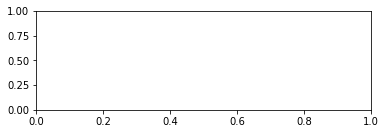

In [16]:
fig =plt.figure(15)

ax1 = plt.subplot(211)

for i in new_df:
    ax1.plot(xnew, new_df[i], 'b', linewidth =0.5, alpha = 0.2)
    
    
ax1.set_ylim((-10,500))
#ax1.set_ylimit(-0.1, 100)
#ax1.set_xlim((1200000,1300000))


mean_freq_change = new_df.mean(axis=1)
ax1.plot(xnew, mean_freq_change, 'b', linewidth =2.0)

ax1.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)

'''
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
#for i in range(len(crimson_on)):
#    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
#    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)

In [ ]:
mean_freq_change = new_df.mean(axis=1)
freq_error = stats.sem(new_df,axis = 1)

In [ ]:
fig =plt.figure(16)


#wbf_means = wbf_means[0:len(wbf_means):10]
#wbf_error = stats.sem(all_wbf,axis = 0)
#wbf_error = wbf_error[0:len(wbf_error):10]

ax2 = fig.add_subplot(212)

ax2.set_ylim((-30,150))
#ax1.set_ylimit(-0.1, 100)
#ax2.set_xlim((1220000,1300000))
#ax2.set_xlim((1340000,1400000))

#ax2.axvspan(0.25, .75, facecolor = 'r', edgecolor = 'none', alpha = 0.3)
ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
ax2.plot(xnew,mean_freq_change, 'b')
ax2.fill_between(xnew,mean_freq_change+freq_error, mean_freq_change-freq_error,color='k', alpha = 0.3, edgecolor = 'none')

ax2.set_title(r'$\mathrm{Activity\ of\ Power \ Muscle:}$', size=12, horizontalalignment='center',  y=1.08)#   \ \mu=100,\ \sigma=15$', size=12, horizontalalignment='center',  y=1.08) #verticalalignment='top')
ax2.set_ylabel('Frequency of Power Muscle Firing', size=10)
plt.xlabel('Time (s)', size=10) # $\phi$', size=10)
#ax2.title('B2 spike frequency')